In [71]:
import random
from PIL import ImageDraw, ImageFilter, Image
import numpy as np
import albumentations as A

In [72]:
#img = Image.open('../data/medical/img/train/drp.en_ko.in_house.deepnatural_002432.jpg')
img = ''

In [73]:
num_noise_points = 60000  # 점의 개수
noise_color = (0, 0, 0)  # 검정색
original_width, original_height = img.size
background_ff = Image.new('RGB', (original_width, original_height), (255, 255, 255))

draw = ImageDraw.Draw(background_ff)
for _ in range(num_noise_points):
    x = random.randint(0, original_width)
    y = random.randint(0, original_height)
    noise_color = (0, 0, 0)
    radius = random.randint(1, 5)
    draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill=noise_color)
background_ff = background_ff.filter(ImageFilter.GaussianBlur(radius=1)) # 점 blur
result_image = Image.blend(img, background_ff, alpha=0.1)
result_image

AttributeError: 'str' object has no attribute 'size'

In [74]:
original_width, original_height = img.size
long_side = max(original_width,original_height)

AttributeError: 'str' object has no attribute 'size'

In [75]:
resized_img = img.resize((int(img.size[0]*0.8), int(img.size[1]*0.8)), Image.BILINEAR)

new_width, new_height = 3500, 4800 # 뒷배경 생성
background_b = Image.new('RGB', (new_width, new_height), (255, 255, 255))
background_f = Image.new('RGB', (new_width, new_height), (255, 255, 255))

# 원본 이미지를 뒷배경에 추가
max_x = new_width - resized_img.size[0]
max_y = new_height - resized_img.size[1]
random_x = random.randint(0, max_x)
random_y = random.randint(0, max_y)
background_b.paste(img, (random_x, random_y))
# new_vertices[:, 0] += random_x  # bbox 위치도 수정
# new_vertices[:, 1] += random_y

# 원하는 노이즈 pepper 추가
num_noise_points = 30000  # 점의 개수
noise_color = (0, 0, 0)  # 검정색

draw = ImageDraw.Draw(background_f)
for _ in range(num_noise_points):
    x = random.randint(0, new_width)
    y = random.randint(0, new_height)
    noise_color = (0, 0, 0)
    radius = random.randint(1, 3)
    draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill=noise_color)
background_f = background_f.filter(ImageFilter.GaussianBlur(radius=1)) # 점 blur
result_image = Image.blend(background_b, background_f, alpha=0.2)
result_image

AttributeError: 'str' object has no attribute 'resize'

In [76]:
blurred_img = img.filter(ImageFilter.GaussianBlur(radius=3))
blurred_img

AttributeError: 'str' object has no attribute 'filter'

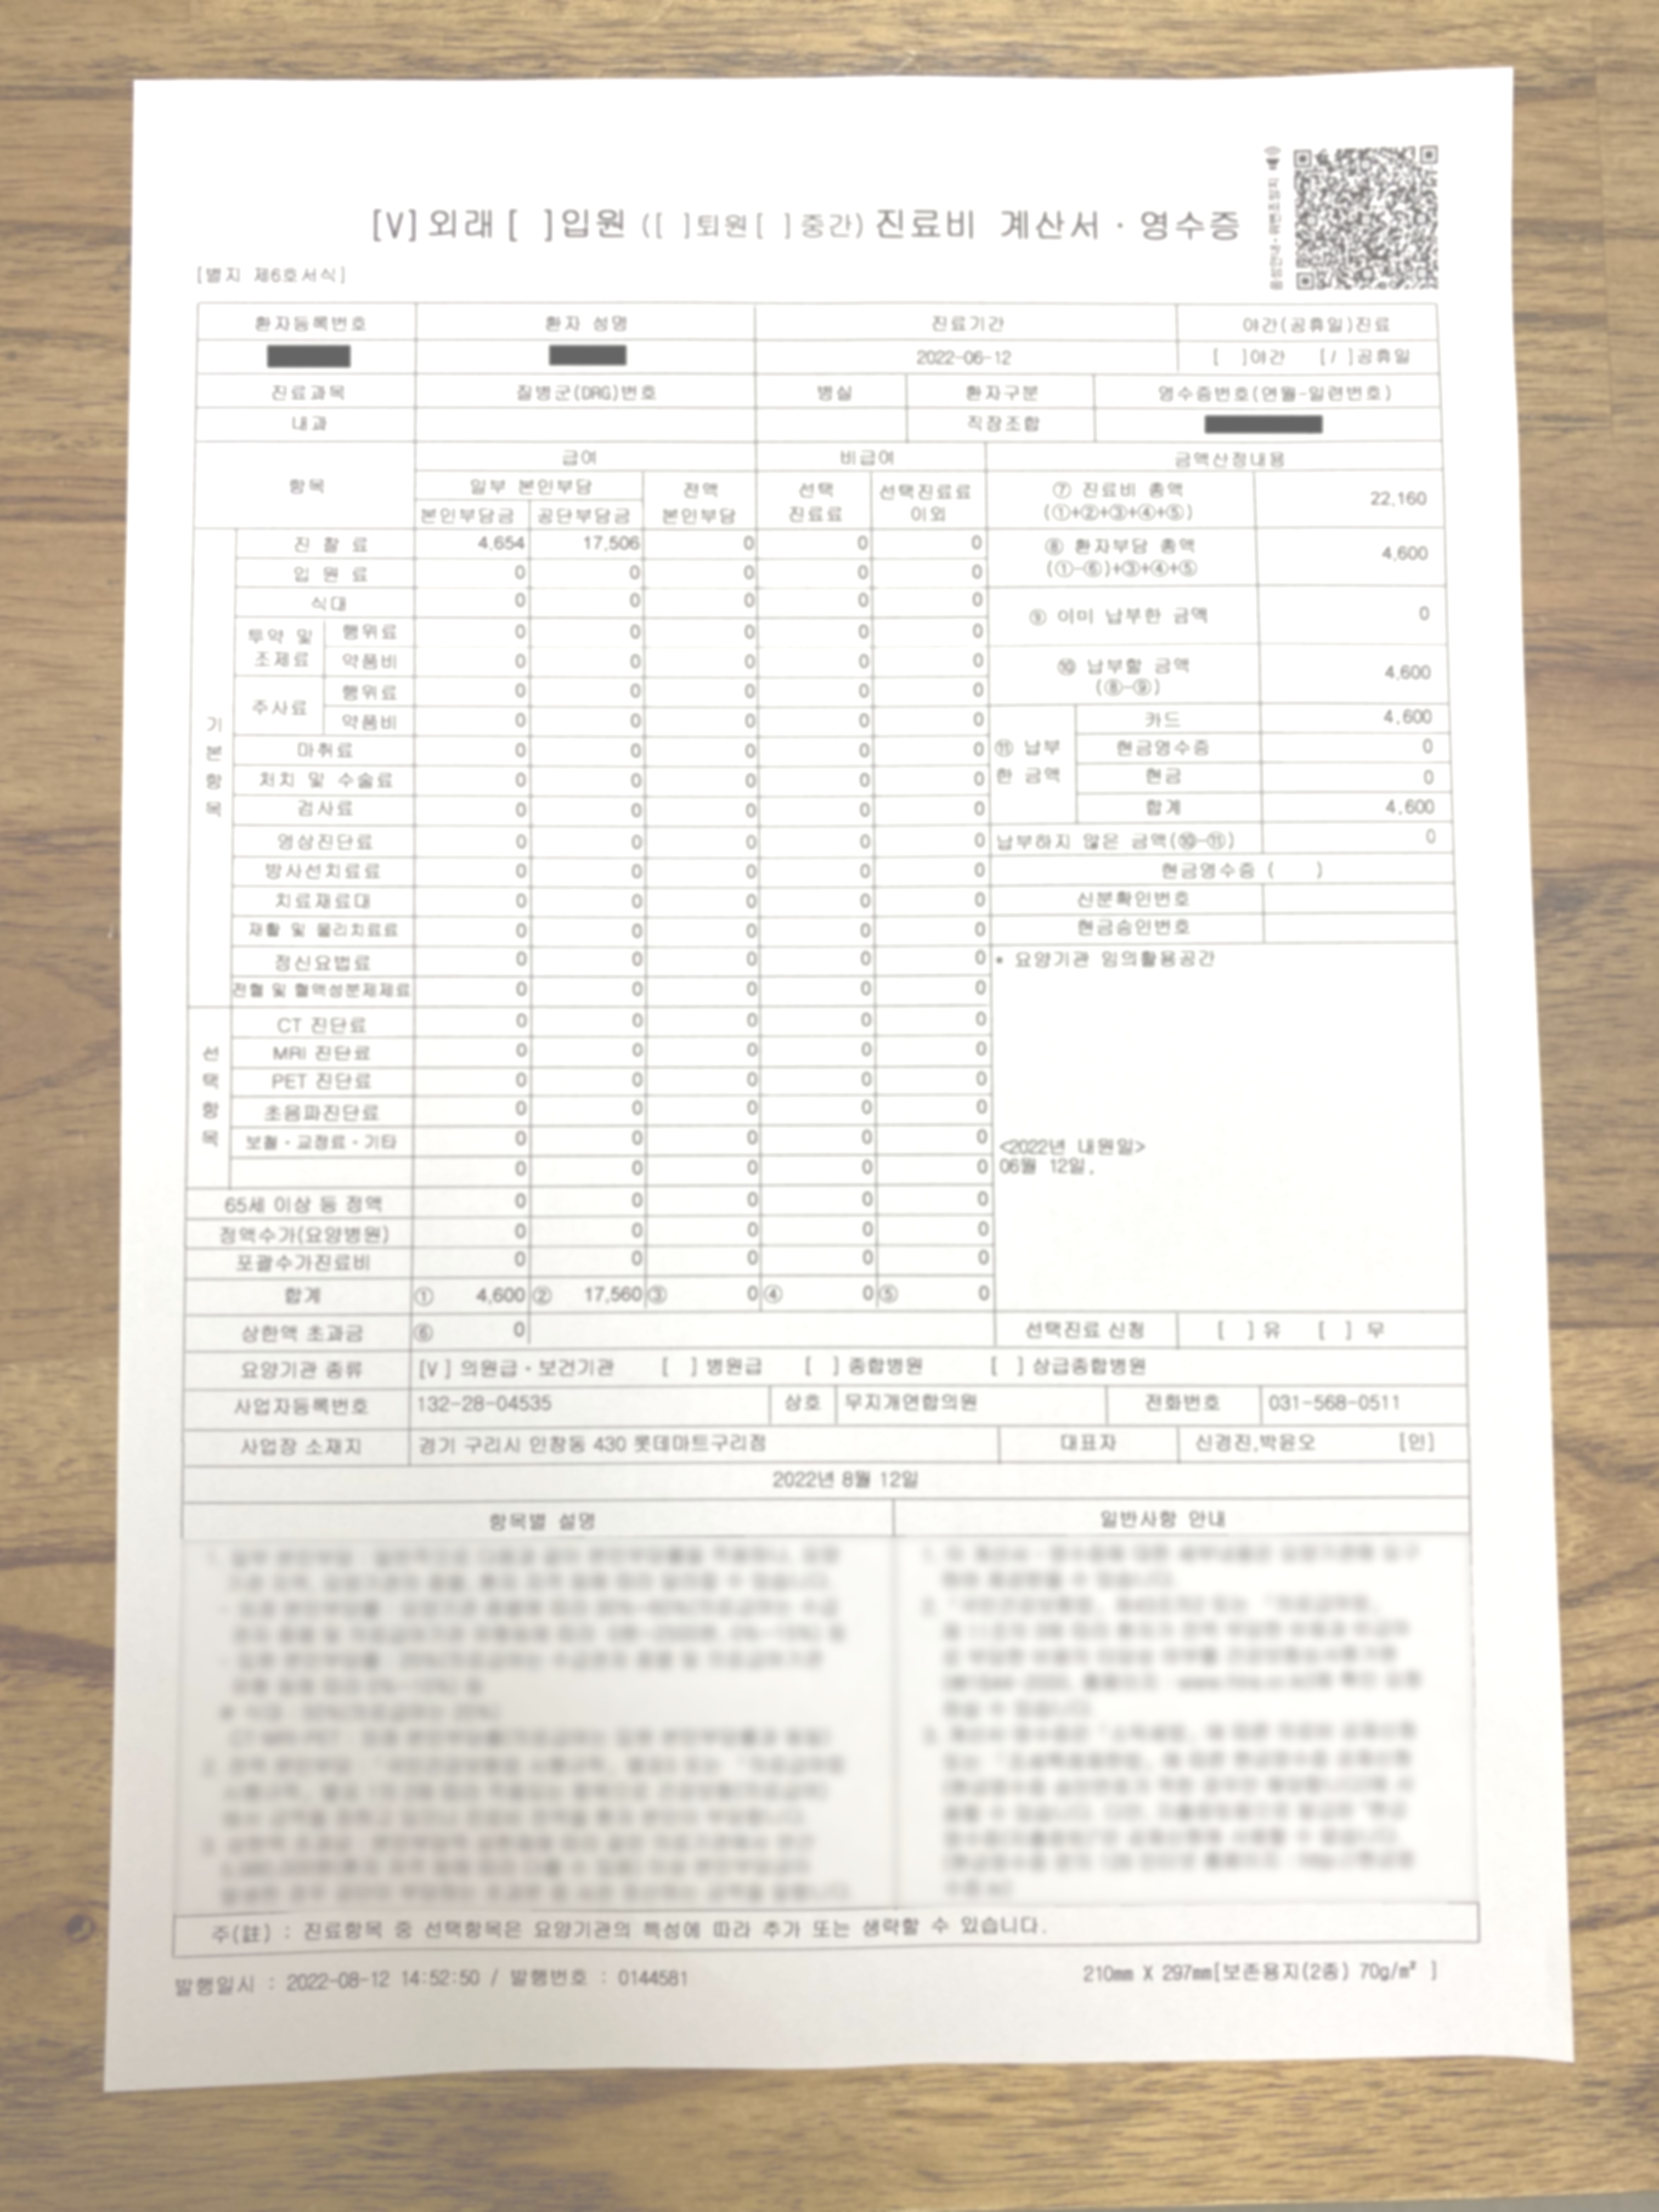

In [77]:
img_np = np.array(blurred_img)

transform = A.RandomBrightnessContrast((0.3,0.5),(-0.3,-0.2), always_apply=True)
brighted_np = transform(image=img_np)['image']
brighted_img = Image.fromarray(np.uint8(brighted_np))
brighted_img

In [78]:
angle_range = 5
num = np.random.rand()
angle = angle_range * (num * 2 - 1)
rotated_img = img.rotate(angle, Image.BILINEAR)
rotated_img

AttributeError: 'str' object has no attribute 'rotate'

In [ ]:
angle

4.035641927073029